In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
#checking missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
#replacing missing values with mean and mode
titanic['age']=titanic['age'].fillna(titanic['age'].mean())

In [14]:
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode()[0])
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode())

In [15]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [16]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [18]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='age'>

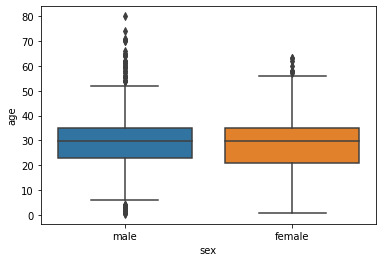

In [21]:
'''Box Plot
Box plots are at their best when a comparison in distributions needs to be performed between
groups. They are compact in their summarization of data, and it is easy to compare groups
through the box and whisker markings' positions.'''
sns.boxplot(data= titanic, y = 'age', x = 'sex')



<AxesSubplot:xlabel='survived', ylabel='age'>

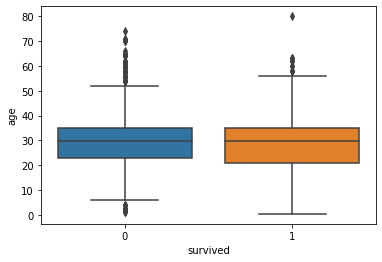

In [22]:

sns.boxplot(y = titanic['age'], x = titanic['survived'])


<AxesSubplot:xlabel='survived', ylabel='sex'>

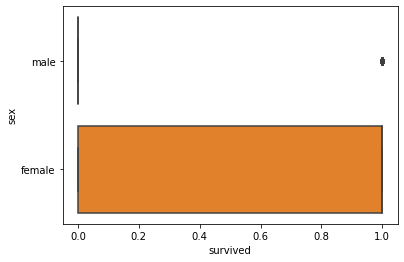

In [23]:

sns.boxplot(y = titanic['sex'], x = titanic['survived'])


<AxesSubplot:xlabel='sex', ylabel='age'>

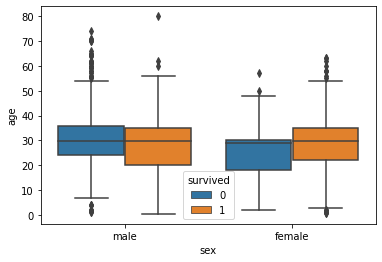

In [24]:
'''When adding a hue semantic, the box for each level of the semantic variable is moved along the
categorical axis so they don’t overlap:'''

sns.boxplot(x = 'sex', y = 'age', hue= 'survived', data= titanic)


In [ ]:
'''From the above plot, we infer that most of the women who survived, their ages ranged between
20 to 30s. It may be because they were given priority. Most men who are aged between 25 and
35 survived.
You can see that men have a high probability of survival when they are between 18 and 30 years
old, which is also a little bit true for women but not fully. For women the survival chances are
higher between 20 and 40.'''